In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
from datasets import load_dataset
from torchvision import transforms

from cvproj.data.process import canny_from_pil
from cvproj.models.pix2pix import Pix2Pix_Turbo
from cvproj.scripts.predict import predcit_simple
from cvproj.data.configs import GenerationConfig
from cvproj.data.dataset import SketchyDataset


/home/patratskiy_ma/miniconda3/envs/cvproj/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/patratskiy_ma/miniconda3/envs/cvproj/lib/python3.10/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_log_freq" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [3]:
cfg = GenerationConfig(input_image_path="/Users/ampiro/programs/CV_PROJ/img2img-turbo/assets/examples/bird.png")

In [54]:
model = Pix2Pix_Turbo(
    pretrained_path="/home/patratskiy_ma/study/CVProj/exp/pokemon_v1/checkpoints/model_401.pkl",
    device="cuda:0",
    diff_steps=1
)

/home/patratskiy_ma/miniconda3/envs/cvproj/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [55]:
dataset = load_dataset("diffusers/pokemon-gpt4-captions")
input_image = canny_from_pil(dataset["train"][10]["image"])

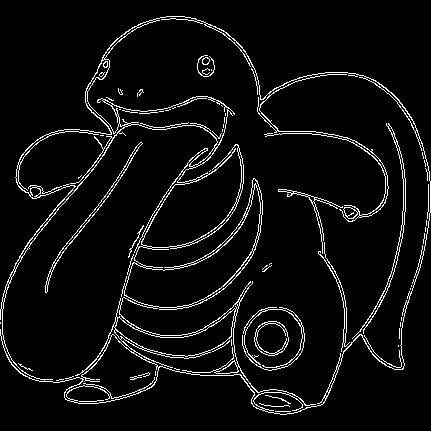

In [56]:
input_image

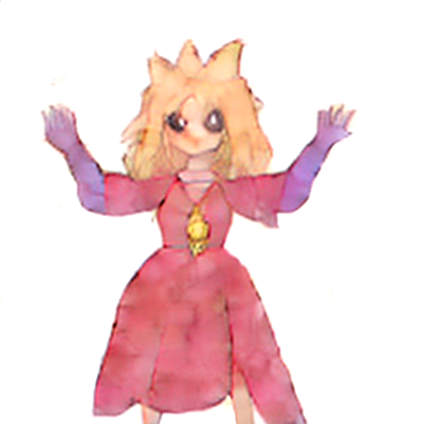

In [71]:
cfg=GenerationConfig(
    gen_type="sketch",
    device="cuda:0",
    lora_gamma=0.125
)

res = predcit_simple(
    model,
    input_image,
    "A colorful illustration of Jynx, a humanoid Pokémon with purple skin, blonde hair, red dress, and a pair of hands extended outward.",
    cfg
)
res

In [62]:
dataset = SketchyDataset(tokenizer=model.tokenizer, split="val", dataset_folder="/home/patratskiy_ma/study/CVProj/data/SketchyCaptions")

In [63]:
dataset[0].keys()

dict_keys(['output_pixel_values', 'conditioning_pixel_values', 'caption', 'input_ids'])

In [64]:
dataset[1000]["caption"]

'a dog running with a frisbee in its mouth'

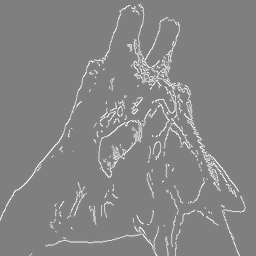

In [60]:
transforms.ToPILImage()(dataset[1000]["conditioning_pixel_values"].cpu() * 0.5 + 0.5)

In [65]:
len(dataset)

1022